# Customer Segmentation for a Marketing Campaign

Use unsupervised learning techniques to segment a company’s customers into distinct groups in order to personalize marketing campaigns. To ultimately propose specific marketing strategies for each customer segment based on the insights obtained.

## Importing librairies

In [61]:
# Importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer


## Importing dataset

In [62]:
# Importing dataset
customer = pd.read_csv(r"D:\Projects\IT\Data Science & IA\Customer_segmentation_for_a_Marketing_Campaign\Data\customer_segmentation.csv")

## Overview dataset

In [63]:
customer #Print head and tail of the dataset

,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Used_Discount,Preferred_Category,Satisfaction_Score
0,56.0,17871.0,58.0,4.0,114.00,1.0,Fashion,2.0
1,69.0,54069.0,NaN,3.0,103.80,1.0,Fashion,1.0
2,46.0,34872.0,4.0,4.0,87.32,0.0,Health,3.0
3,32.0,NaN,20.0,8.0,139.25,0.0,Home,3.0
4,NaN,37068.0,10.0,5.0,169.29,0.0,Electronics,2.0
...,...,...,...,...,...,...,...,...
1015,32.0,29757.0,84.0,4.0,51.77,1.0,Home,3.0
1016,36.0,38890.0,90.0,3.0,NaN,1.0,Health,NaN
1017,NaN,21866.0,42.0,5.0,192.66,0.0,Leisure,NaN
1018,52.0,NaN,33.0,7.0,202.61,0.0,Home,1.0


In [64]:
customer.info() #Print more information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 969 non-null    float64
 1   Annual_Income       968 non-null    float64
 2   Spending_Score      970 non-null    float64
 3   Visit_Frequency     970 non-null    float64
 4   Average_Basket      967 non-null    float64
 5   Used_Discount       968 non-null    float64
 6   Preferred_Category  969 non-null    object 
 7   Satisfaction_Score  968 non-null    float64
dtypes: float64(7), object(1)
memory usage: 63.9+ KB


## Data Preprocessing

### Transform categorical data into numerics

In [65]:
label_encoder = LabelEncoder()
customer['Pref_Category_Num'] = label_encoder.fit_transform(customer['Preferred_Category'])

### Reconfiguring the new database

In [66]:
# Chercking type of the object
type(customer)

# Define columns of my DataFrame
columns = ['Age', 'Annual_Income', 'Spending_Score', 'Visit_Frequency',
       'Average_Basket', 'Used_Discount', 'Preferred_Category',
       'Satisfaction_Score', 'Pref_Category_Num']

# Apply the columns of my ndarray
customer_data = pd.DataFrame(customer, columns=customer.columns)

# Remove an object column into the dataset
customer = customer_data.select_dtypes(exclude=['object'])

### Print more information about the missing values

<Axes: >

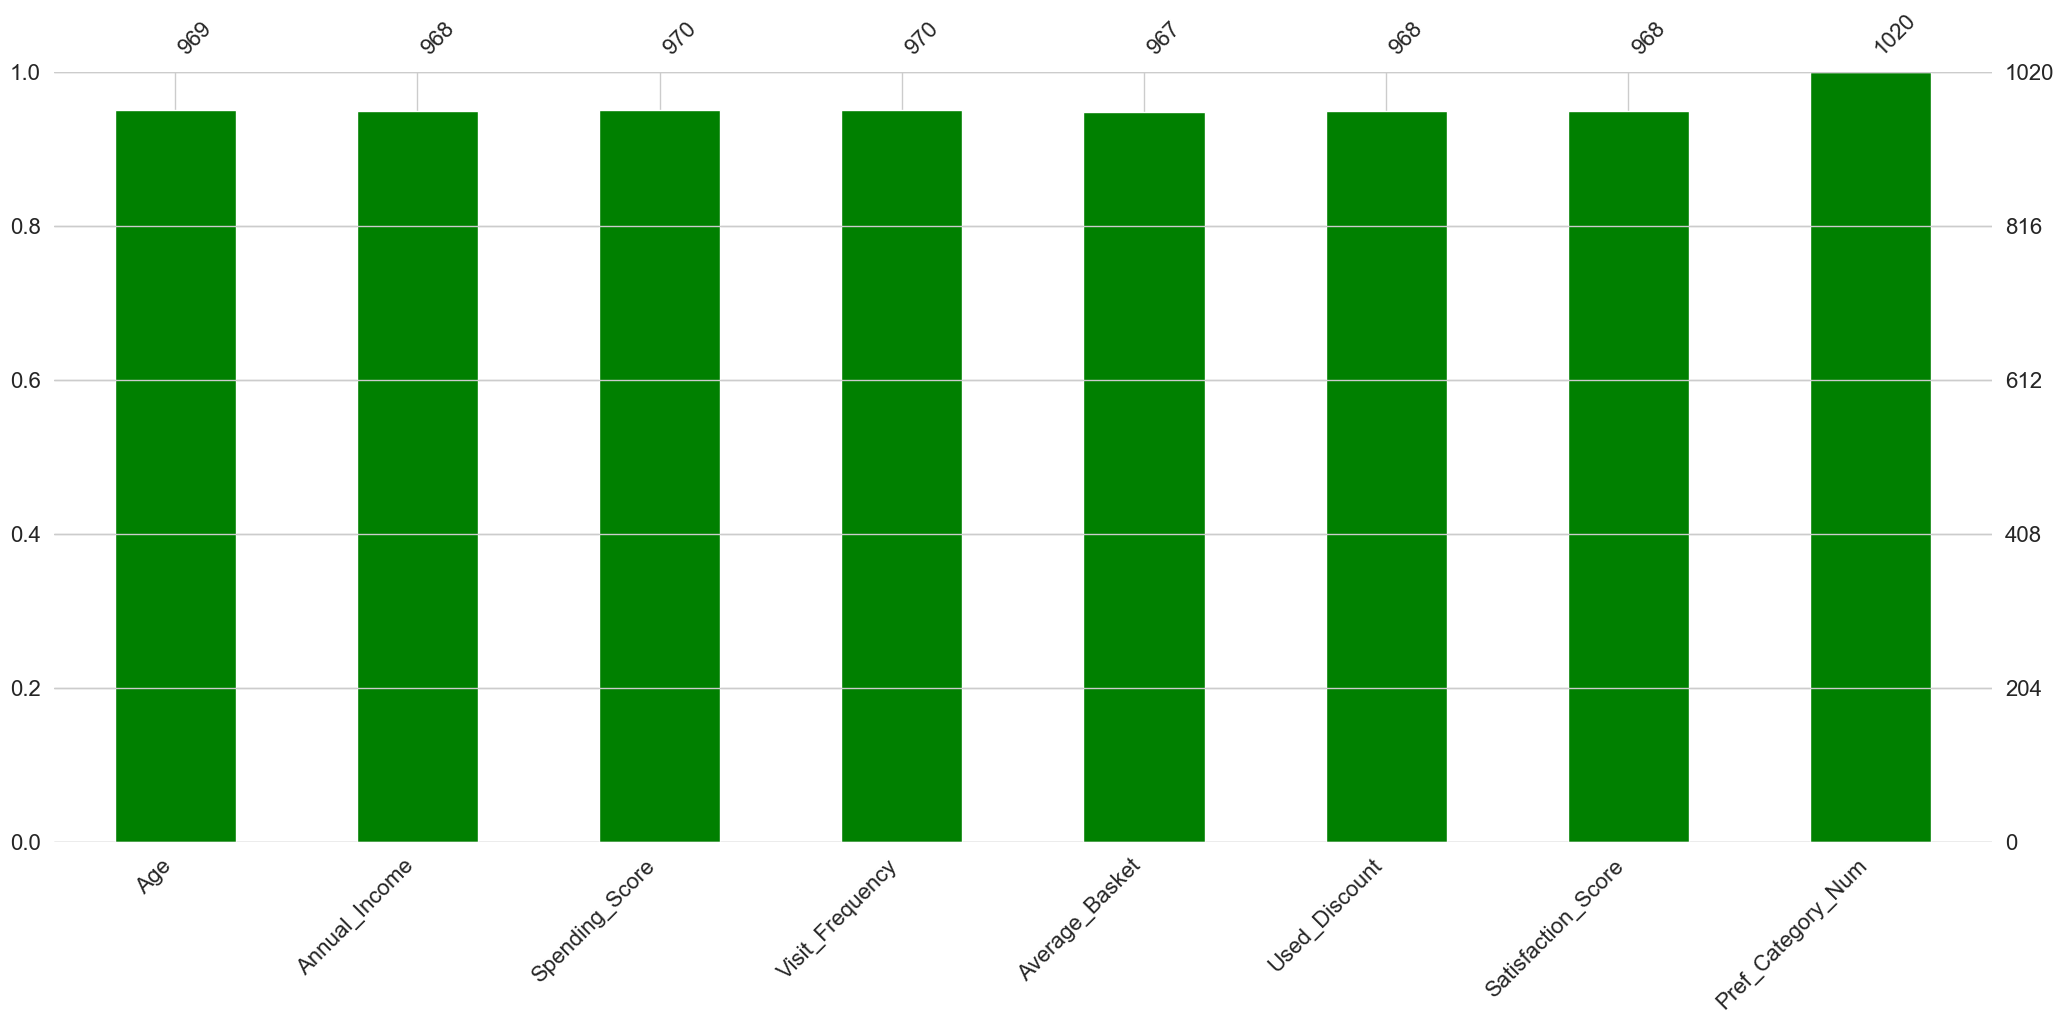

In [67]:
# Graphical visualization of missing values
msno.bar(customer, color='green')

### Handling missing values using the KNN method

<Axes: >

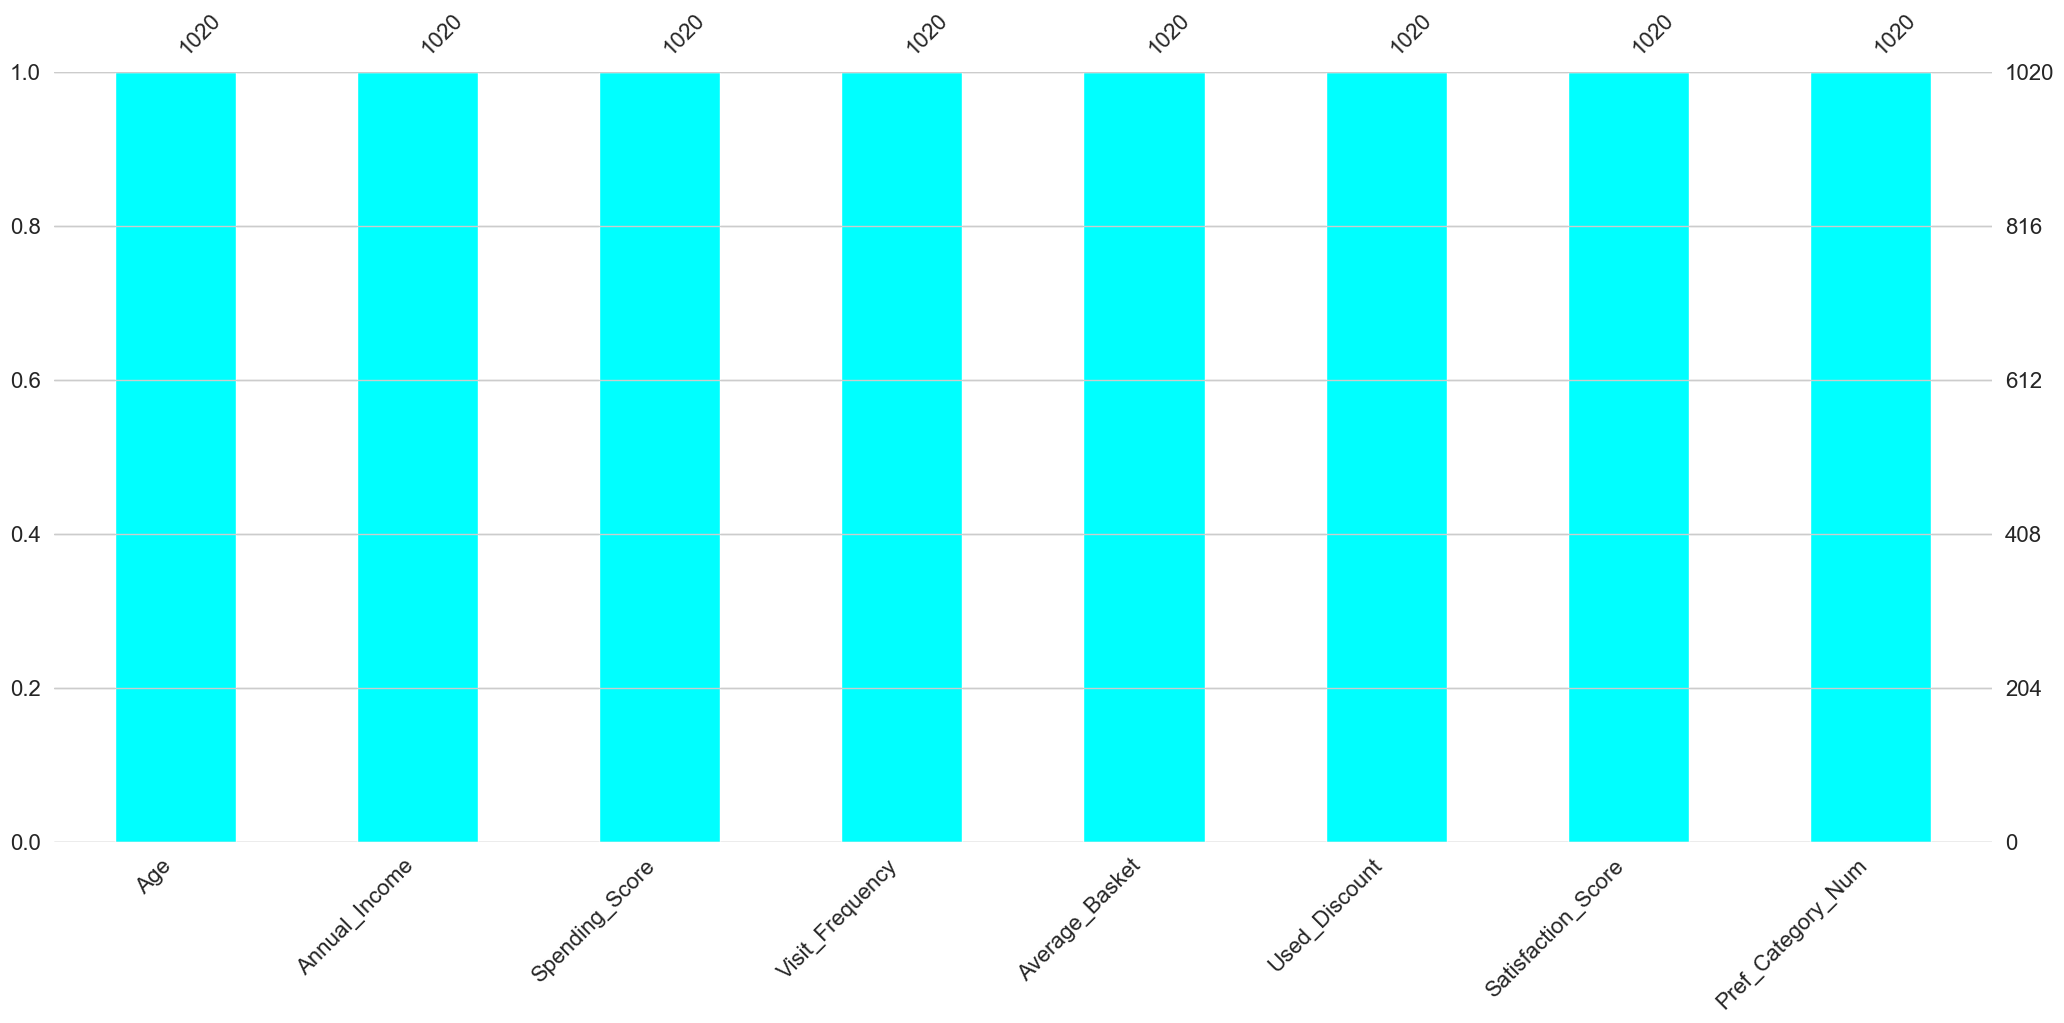

In [68]:
# Handling missing values using the KNN method
knn = KNNImputer(n_neighbors=3)

customer = pd.DataFrame(knn.fit_transform(customer), columns=customer.columns)

# re-Ckercking of missing data
msno.bar(customer, color='cyan')

### Checking duplicates and remove them

In [69]:
customer.duplicated().sum() #Chercking duplicates
customer = customer.drop_duplicates() # Remove duplicates

### Detection & Correction of Outliers

In [70]:
#Outiliers detection

for column in customer.select_dtypes(include=[np.number]).columns :
    Q1 = customer[column].quantile(0.25)
    Q3 = customer[column].quantile(0.75)
    IQR = Q3 - Q1

    # Limits
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    # Outliers corrections
    customer[column] = np.clip(customer[column], lower_bound, upper_bound)

customer

,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Used_Discount,Satisfaction_Score,Pref_Category_Num
0,56.000000,17871.000000,58.000000,4.000000,114.000000,1.000000,2.0,1.0
1,69.000000,54069.000000,48.333333,3.000000,103.800000,1.000000,1.0,1.0
2,46.000000,34872.000000,4.000000,4.000000,87.320000,0.000000,3.0,2.0
3,32.000000,59842.666667,20.000000,8.000000,139.250000,0.000000,3.0,3.0
4,45.000000,37068.000000,10.000000,5.000000,169.290000,0.000000,2.0,0.0
...,...,...,...,...,...,...,...,...
995,48.666667,58390.000000,77.000000,5.000000,108.020000,0.333333,5.0,4.0
996,64.000000,32250.000000,45.000000,5.000000,218.610000,1.000000,2.0,4.0
997,62.000000,41250.000000,96.000000,5.000000,157.100000,0.000000,5.0,4.0
998,35.000000,64447.000000,34.000000,4.333333,116.350000,0.000000,2.0,0.0


### Converting an round

In [71]:
customer_rounded = round(customer)
customer_rounded

,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Used_Discount,Satisfaction_Score,Pref_Category_Num
0,56.0,17871.0,58.0,4.0,114.0,1.0,2.0,1.0
1,69.0,54069.0,48.0,3.0,104.0,1.0,1.0,1.0
2,46.0,34872.0,4.0,4.0,87.0,0.0,3.0,2.0
3,32.0,59843.0,20.0,8.0,139.0,0.0,3.0,3.0
4,45.0,37068.0,10.0,5.0,169.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...
995,49.0,58390.0,77.0,5.0,108.0,0.0,5.0,4.0
996,64.0,32250.0,45.0,5.0,219.0,1.0,2.0,4.0
997,62.0,41250.0,96.0,5.0,157.0,0.0,5.0,4.0
998,35.0,64447.0,34.0,4.0,116.0,0.0,2.0,0.0


### Data normalization

In [72]:
# Data normalization
min_scaler = MinMaxScaler()
customer_data_normalized = pd.DataFrame(min_scaler.fit_transform(customer_rounded), columns=customer_rounded.columns)
customer_data_normalized

,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Used_Discount,Satisfaction_Score,Pref_Category_Num
0,0.745098,0.168739,0.48750,0.375,0.373239,1.0,0.25,0.2
1,1.000000,0.533157,0.42500,0.250,0.338028,1.0,0.00,0.2
2,0.549020,0.339894,0.15000,0.375,0.278169,0.0,0.50,0.4
3,0.274510,0.591286,0.25000,0.875,0.461268,0.0,0.50,0.6
4,0.529412,0.362002,0.18750,0.500,0.566901,0.0,0.25,0.0
...,...,...,...,...,...,...,...,...
995,0.607843,0.576658,0.60625,0.500,0.352113,0.0,1.00,0.8
996,0.901961,0.313497,0.40625,0.500,0.742958,1.0,0.25,0.8
997,0.862745,0.404103,0.72500,0.500,0.524648,0.0,1.00,0.8
998,0.333333,0.637636,0.33750,0.375,0.380282,0.0,0.25,0.0


### Exporting new dataset

In [73]:
# Exporting new dataset
customer_data_normalized.to_csv("./Data/customer.csv", index=False)

## Exploratory Data Analysis

In [74]:
# Importinf of dataset after preprocessing
data_treated = pd.read_csv(r'D:\Projects\IT\Data Science & IA\Customer_segmentation_for_a_Marketing_Campaign\Data\customer.csv')

### Statistic descriptive

In [75]:
statistic = data_treated.describe()
statistic

,Age,Annual_Income,Spending_Score,Visit_Frequency,Average_Basket,Used_Discount,Satisfaction_Score,Pref_Category_Num
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.508157,0.504794,0.436744,0.490750,0.498504,0.314000,0.488250,0.423200
std,0.290009,0.197119,0.175088,0.244897,0.181203,0.464349,0.352205,0.308735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274510,0.374999,0.292187,0.375000,0.373239,0.000000,0.250000,0.200000
50%,0.529412,0.505884,0.431250,0.500000,0.496479,0.000000,0.500000,0.400000
75%,0.745098,0.624999,0.575000,0.625000,0.623239,1.000000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Visualization

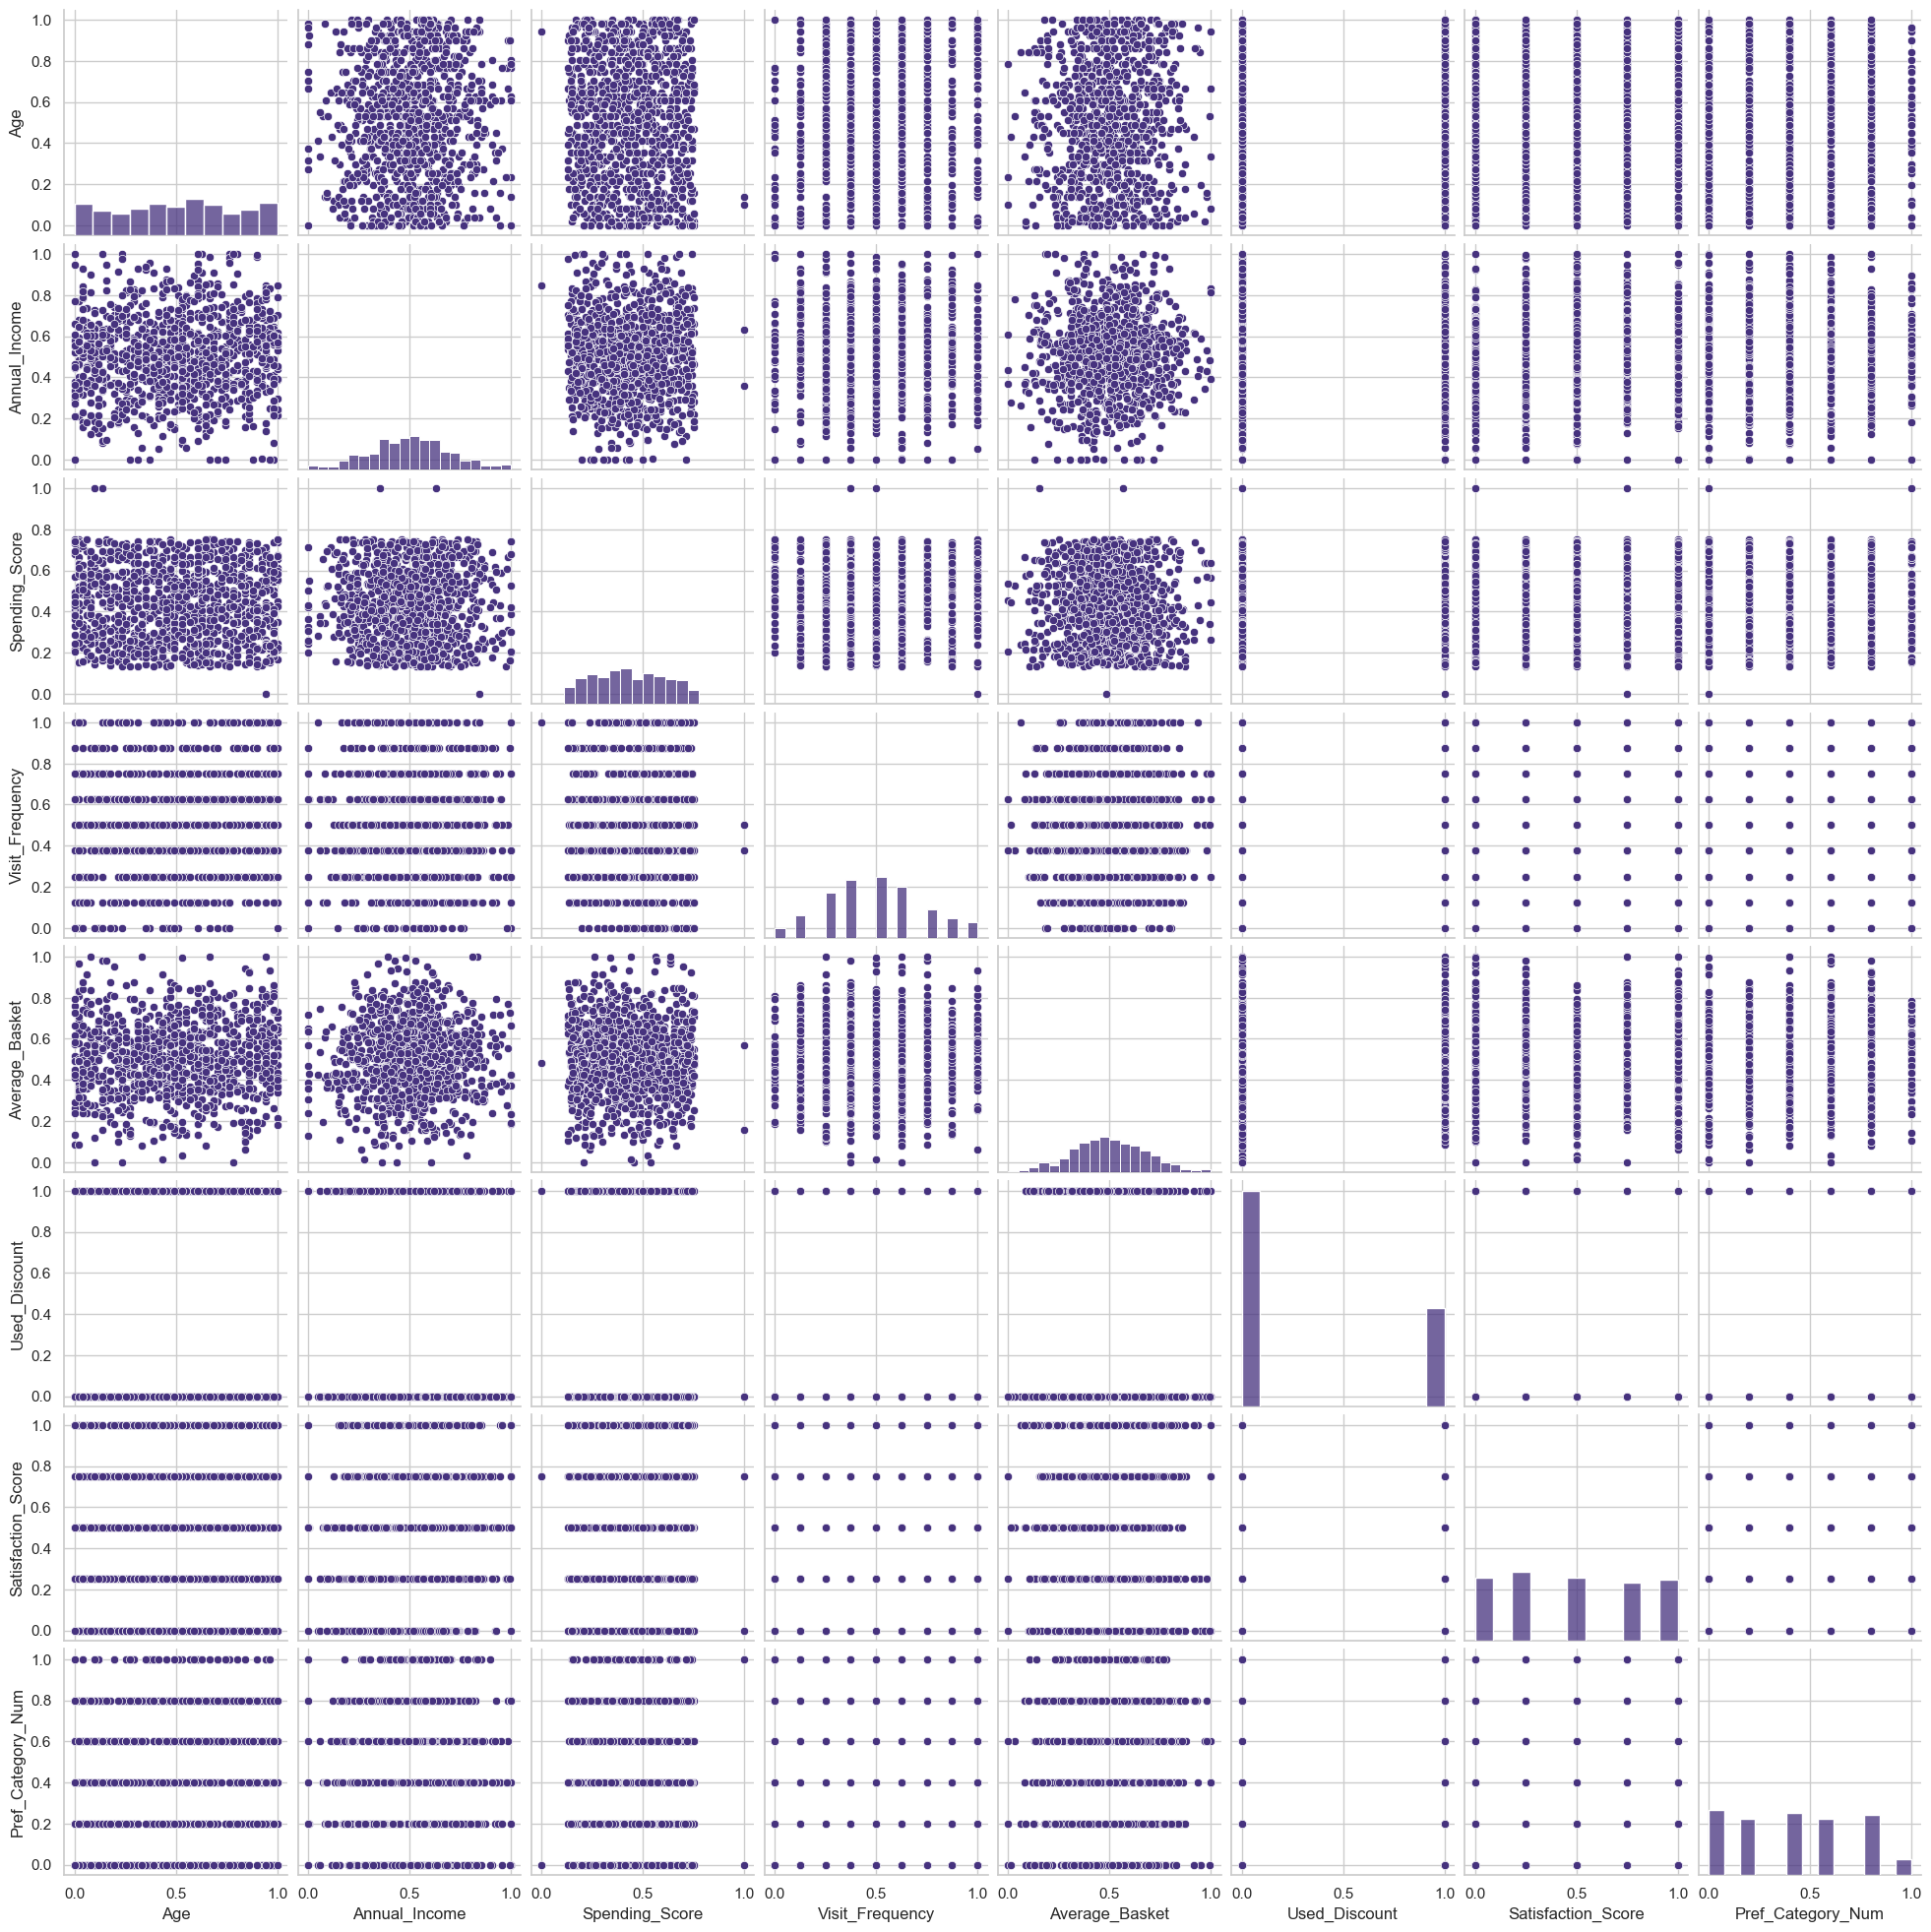

In [76]:
# Data visualization
sns.pairplot(data_treated)
plt.show()

### Matrix correlation

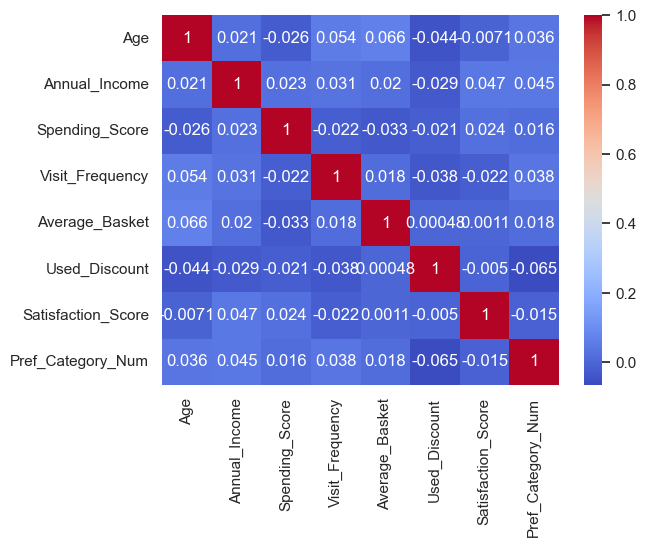

In [77]:
# Heatmap visualization
data_correlation = data_treated.corr()
sns.heatmap(data_correlation, annot=True, cmap="coolwarm")
plt.show()

## Principal Components Analysis

In [78]:
# Principal Components Analysis
pca = PCA(n_components=0.98)
pca_data = pd.DataFrame(pca.fit_transform(data_treated))
pca_data

,0,1,2,3,4,5,6,7
0,0.699436,-0.237115,-0.135454,0.275746,-0.148040,-0.308032,-0.139184,0.043903
1,0.687454,-0.476904,-0.078170,0.504370,-0.291470,0.057221,-0.179278,-0.066842
2,-0.303587,0.005153,-0.067467,0.016933,-0.128193,-0.201435,-0.085283,-0.333150
3,-0.326689,-0.005153,0.117911,-0.229646,0.404548,0.036000,0.039483,-0.189910
4,-0.274345,-0.223759,-0.447100,0.137424,0.020794,-0.132531,0.163980,-0.182158
...,...,...,...,...,...,...,...,...
995,-0.353197,0.490899,0.388703,-0.024172,-0.025267,0.030042,-0.205473,0.081533
996,0.639020,-0.275834,0.507581,0.300880,-0.071122,-0.181346,0.209309,0.086218
997,-0.363674,0.480116,0.451640,0.223082,-0.072854,-0.122133,-0.101592,0.274108
998,-0.266980,-0.202444,-0.499967,-0.076856,-0.064646,0.150049,-0.059082,-0.146872


### PCA Data Visualization

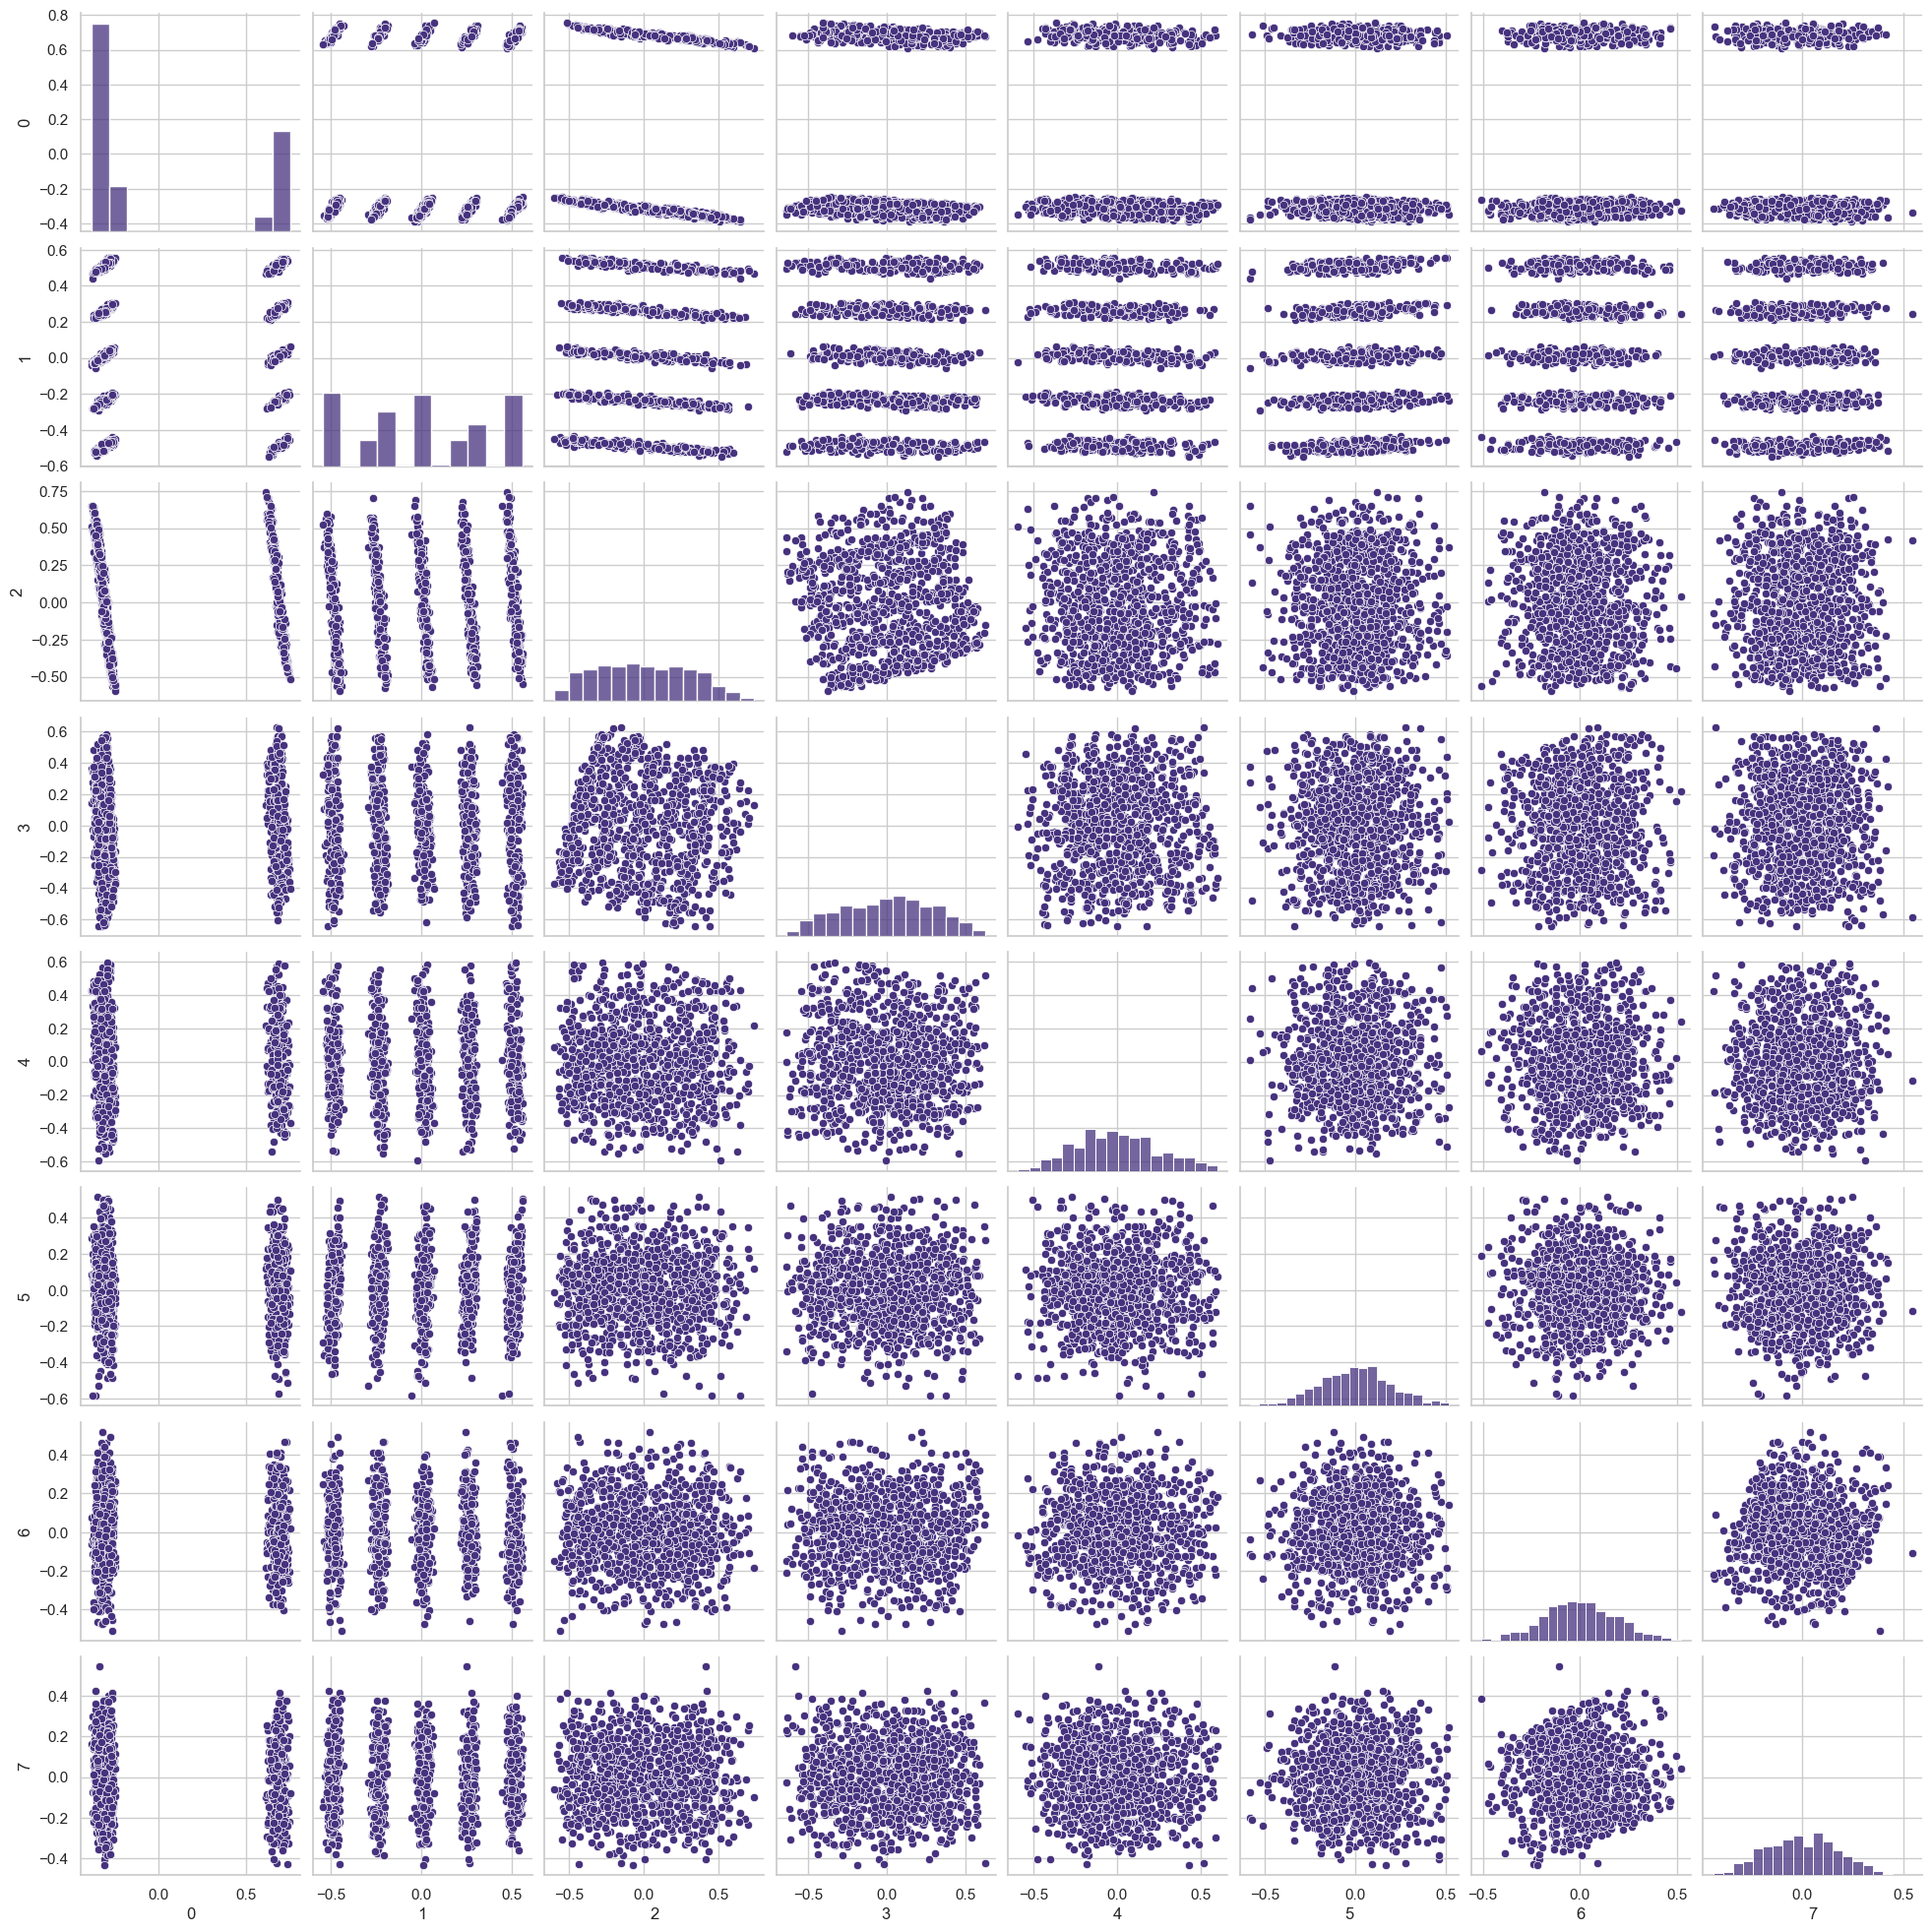

In [79]:
# PCA Data Visualization
sns.pairplot(pca_data)
plt.show()

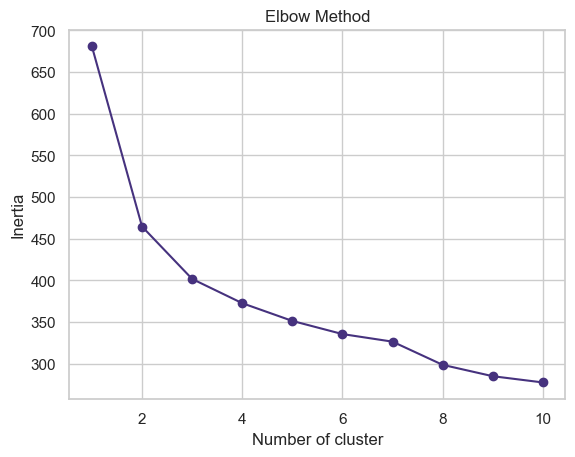

In [80]:
#Initialize n_cluster
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertias.append(kmeans.inertia_)

# Graphical visualization
plt.plot(range(1,11), inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [81]:
# Apply of KMeans method
kmean = KMeans(n_clusters=2, random_state=0)
labels = kmean.fit_predict(pca_data)
pca_data['Clusters'] = labels

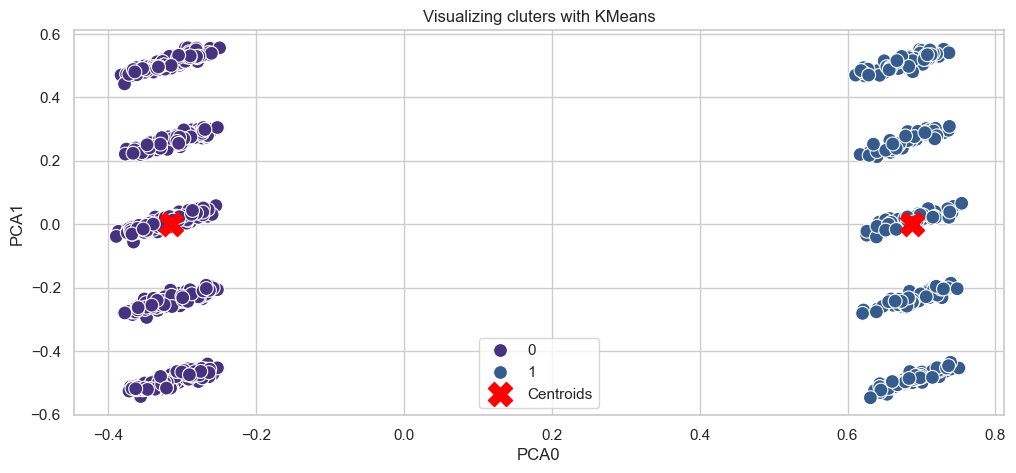

In [82]:
# Data viz
sns.set(style='whitegrid',palette='viridis')
plt.figure(figsize=(12,5))
sns.scatterplot(data=pca_data, x=pca_data.columns[0], y=pca_data.columns[1], hue='Clusters', s=100)

# Centroids
centroids = kmean.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=300, c='red',marker='X',label='Centroids'
)

plt.title('Visualizing cluters with KMeans')
plt.xlabel('PCA0')
plt.ylabel('PCA1')
plt.legend()
plt.show()

In [83]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31820991, 0.18249563, 0.14040102, 0.12289944, 0.0869218 ,
       0.05660917, 0.04833553, 0.0441275 ])

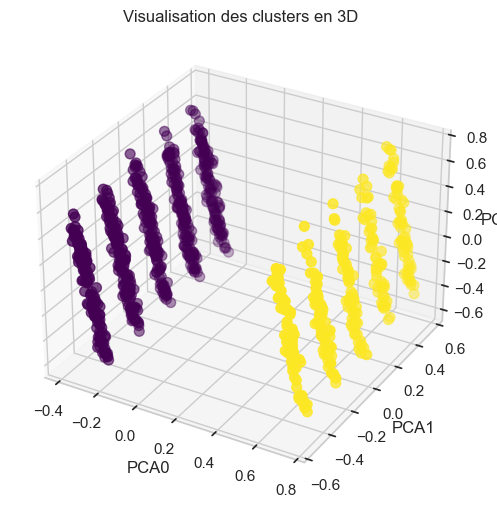

In [84]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2], c=pca_data['Clusters'], cmap='viridis', s=50)
ax.set_xlabel("PCA0")
ax.set_ylabel("PCA1")
ax.set_zlabel("PCA2")
plt.title("Visualisation des clusters en 3D")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Convertir les noms de colonnes en chaînes de caractères
pca_data.columns = pca_data.columns.astype(str)

# Application de DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(pca_data)

# Ajouter les labels de clusters au DataFrame
pca_data['cluster'] = labels

# Visualisation des clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.title('Clustering DBSCAN')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
